SIN-392 - Introduction to Digital Image Processing (2023-1)

# Lecture 06 - Spatial filtering - Convolution (Part 1)

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/)) 

-----

## Importing the libraries

In [1]:
import numpy as np

from scipy import ndimage as ndi
from skimage import util

import matplotlib
import matplotlib.pyplot as plt

### %matplotlib notebook
SMALL_SIZE = 7
matplotlib.rc('font', size=SMALL_SIZE)

## Creating a simple image

In [2]:
img = np.array([[1, 0, 6, 4],
                [2, 1, 7, 2],
                [5, 0, 2, 3],
                [5, 0, 3, 2]], dtype=np.uint8)

## Creating a convolution kernel

In [3]:
w = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]], dtype=np.uint8)

## Convolution with padding = 0

In [4]:
img_filt = ndi.convolve(img, w, mode='constant', cval=0)

In [5]:
img_filt

array([[ 10,  45,  65,  81],
       [ 32, 113, 132, 150],
       [ 58, 131, 109, 119],
       [ 65, 101,  60,  70]], dtype=uint8)

## Convolution with reflected padding

In [6]:
img_filt = ndi.convolve(img, w, mode='reflect')

In [7]:
img_filt

array([[ 39,  96, 141, 213],
       [ 68, 113, 132, 189],
       [121, 131, 109, 147],
       [165, 119,  68, 114]], dtype=uint8)

## Loading an image from disk

In [8]:
img_gray = plt.imread('./images/boat.tif')

# Information about the images
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(512, 512) uint8 0 239


## Spatial filtering by convolution

In [9]:
img_filt = ndi.convolve(img_gray.astype(np.uint16), w)

In [10]:
print(img_filt.shape, img_filt.dtype, img_filt.min(), img_filt.max())

(512, 512) uint16 758 10267


### Plotting the images

(-0.5, 511.5, 511.5, -0.5)

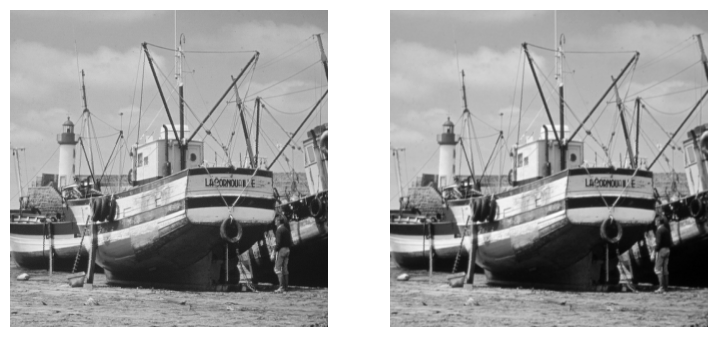

In [11]:
fig, ((ax1, ax5)) = plt.subplots(1, 2, figsize=(9, 5))
# Plots the original image
img_ = ax1.imshow(img_gray, cmap='gray')
ax1.axis('off')

# Plots the filtered image
img_ = ax5.imshow(img_filt, cmap='gray')
ax5.axis('off')

## Spoilers for upcoming classes

In [12]:
img_gray = util.img_as_float(img_gray)

### Low pass filter

In [13]:
w_low = np.ones([3, 3], dtype=float) / 9
print(w_low)

# Sum of all values in the kernel
print(w_low.sum())

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
1.0


In [14]:
img_filt_low = ndi.convolve(img_gray, w_low)

(-0.5, 511.5, 511.5, -0.5)

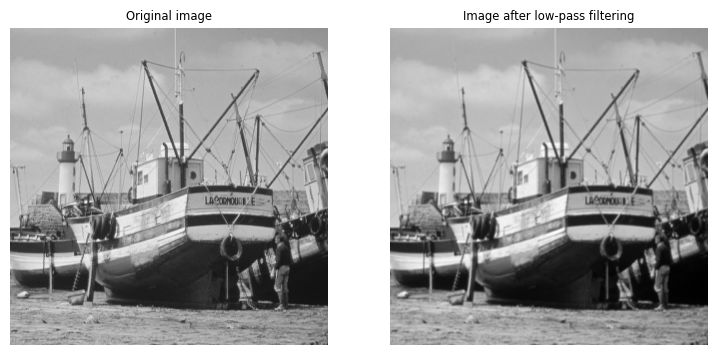

In [15]:
fig, ((ax1, ax5)) = plt.subplots(1, 2, figsize=(9,5))
# Plots the original image
img_ = ax1.imshow(img_gray, cmap='gray')
ax1.set_title('Original image')
ax1.axis('off')

# Plots the filtered image
img_ = ax5.imshow(img_filt_low, cmap='gray')
ax5.set_title('Image after low-pass filtering')
ax5.axis('off')

### High pass filter

In [16]:
# w_high = np.array([[0,  1, 0],
#                    [1, -4, 1],
#                    [0,  1, 0]], dtype=float)

w_high = np.array([[1,  1, 1],
                   [1, -8, 1],
                   [1,  1, 1]], dtype=float)

print(w_high)
# Sum of all values in the kernel
print(w_high.sum())

[[ 1.  1.  1.]
 [ 1. -8.  1.]
 [ 1.  1.  1.]]
0.0


In [17]:
img_filt_high = ndi.convolve(img_gray, w_high)

print(img_filt_high.shape, img_filt_high.dtype, img_filt_high.min(), img_filt_high.max())

(512, 512) float64 -2.55686274509804 2.5215686274509803


(-0.5, 511.5, 511.5, -0.5)

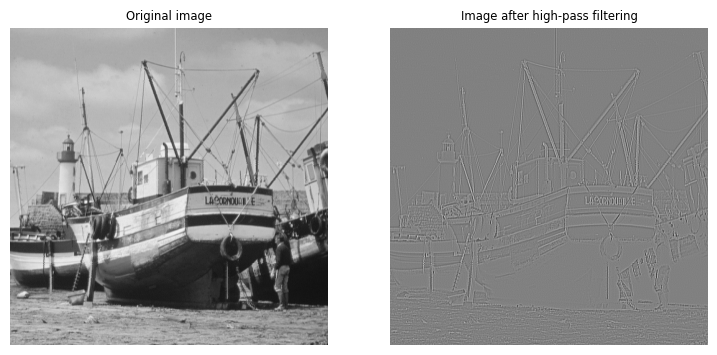

In [18]:
fig, ((ax1, ax5)) = plt.subplots(1, 2, figsize=(9,5))
# Plots the original image
img_ = ax1.imshow(img_gray, cmap='gray')
ax1.set_title('Original image')
ax1.axis('off')

# Plots the filtered image
img_ = ax5.imshow(img_filt_high, cmap='gray')
ax5.set_title('Image after high-pass filtering')
ax5.axis('off')

### More spoilers...

In [19]:
img_filt_low_high = ndi.convolve(img_filt_low, w_high)

print(img_filt_low_high.shape, img_filt_low_high.dtype, img_filt_low_high.min(), img_filt_low_high.max())

(512, 512) float64 -0.9586056644880161 0.7167755991285398


(-0.5, 511.5, 511.5, -0.5)

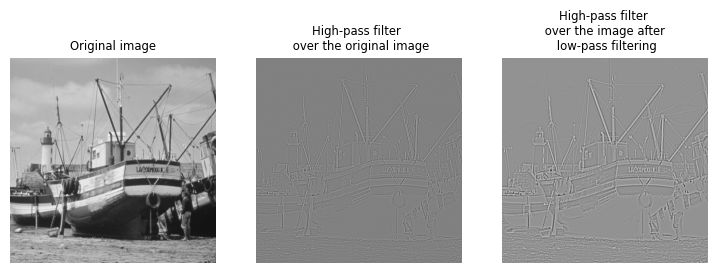

In [20]:
fig, ((ax1, ax2, ax5)) = plt.subplots(1, 3, figsize=(9,4))

img_ = ax1.imshow(img_gray, cmap='gray')
ax1.set_title('Original image')
ax1.axis('off')

img_ = ax2.imshow(img_filt_high, cmap='gray')
ax2.set_title('High-pass filter \n over the original image')
ax2.axis('off')

img_ = ax5.imshow(img_filt_low_high, cmap='gray')
ax5.set_title('High-pass filter \n over the image after \n low-pass filtering')
ax5.axis('off')

### It can be improved...

In [21]:
w_low_5 = np.ones([5, 5], dtype=float) / (5 * 5)

In [22]:
img_low_high_2 = ndi.convolve(ndi.convolve(img_gray, w_low_5), w_high)

(-0.5, 511.5, 511.5, -0.5)

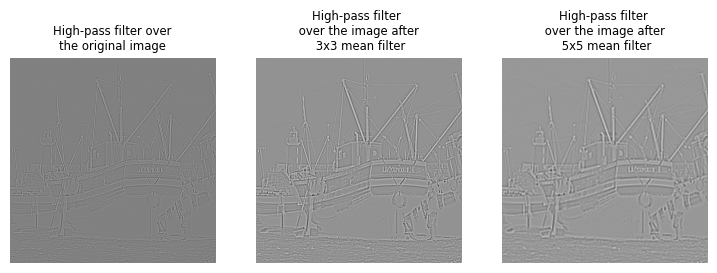

In [23]:
fig, ((ax1, ax2, ax5)) = plt.subplots(1, 3, figsize=(9,4))

img_ = ax1.imshow(img_filt_high, cmap='gray')
ax1.set_title('High-pass filter over\nthe original image')
ax1.axis('off')

img_ = ax2.imshow(img_filt_low_high, cmap='gray')
ax2.set_title('High-pass filter \n over the image after \n 3x3 mean filter')
ax2.axis('off')

img_ = ax5.imshow(img_low_high_2, cmap='gray')
ax5.set_title('High-pass filter \n over the image after \n 5x5 mean filter')
ax5.axis('off')

## Bibliography
---

* MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.
    * In Brazilian Portuguese.
    * Available for download on the author's website (Personal use only).
    * http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  
* GONZALEZ, R.C.; WOODS, R.E.; Digital Image Processing. 3rd edition. Pearson, 2009.
* J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.
    * In Brazilian Portuguese.
    * http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  
* Universidade de Waterloo. Image Repository.
    * http://links.uwaterloo.ca/Repository.html
* The USC-SIPI Image Database    
    * http://sipi.usc.edu/database/database.php
* Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    * http://scipy-lectures.org/
* scikit-image. Documentation.
    * https://scikit-image.org/docs/dev/index.html
* scikit-image. Documentação. Module 'filters'.
    * https://scikit-image.org/docs/dev/api/skimage.filters.html
* NumPy. Documentation.
    * https://numpy.org/doc/stable/
* NumPy. Convolution
    * https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html
* More about Convolutional Neural Networks...
    * Amelie Byun et al. CS231n: Convolutional Neural Networks for Visual Recognition. Spring 2020
    * https://cs231n.github.io/convolutional-networks/          